In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
import os
from src.brayton_cycle import BraytonCycle

In [2]:
config_path = os.path.join('..', 'config', 'brayton.yaml')
with open(config_path, 'r') as f:
    brayton_cfg = yaml.safe_load(f)

brayton_system = BraytonCycle(brayton_cfg)

r_values = np.linspace(1.0, 15.0, 100)
efficiencies = brayton_system.get_efficiency(r_values)

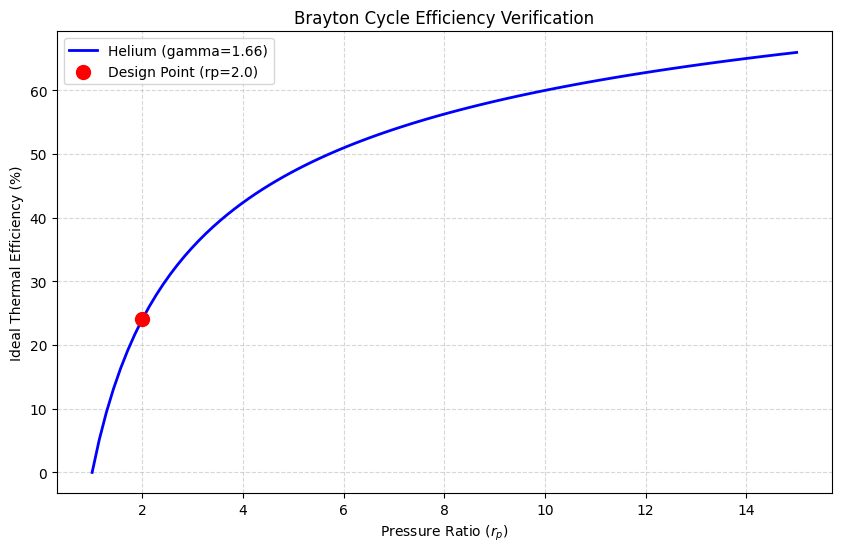

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(r_values, efficiencies * 100, 'b-', linewidth=2, label=f"Helium (gamma={brayton_system.gamma})")

design_rp = brayton_cfg['design_point']['pressure_ratio']
design_eff = brayton_system.get_efficiency(design_rp)

plt.scatter(design_rp, design_eff * 100, color='red', s=100, zorder=5, label=f'Design Point (rp={design_rp})')

plt.xlabel("Pressure Ratio ($r_p$)")
plt.ylabel("Ideal Thermal Efficiency (%)")
plt.title("Brayton Cycle Efficiency Verification")
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.show()